In [2]:
# Installing required libraries
!pip install --quiet scikit-learn pandas numpy matplotlib seaborn umap-learn joblib tensorflow
!pip install --quiet mofapy2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 26.4 MB/s eta 0:00:00


In [3]:
# Importing libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import umap
import tensorflow as tf
from tensorflow.keras import layers


In [6]:
# Creating synthetic multi-omics data
nsamples = 150
labels = np.random.randint(0, 2, nsamples) # Synthetic labels (e.g., disease vs healthy)

# RNA-seq data (e.g., gene expression)
rna_features = 1000
rna_data = np.random.rand(nsamples, rna_features) * 100
rna_df = pd.DataFrame(rna_data, columns=[f'gene_{i}' for i in range(rna_features)])

# Proteomics data (e.g., protein abundance)
prot_features = 200
prot_data = np.random.rand(nsamples, prot_features) * 10
prot_df = pd.DataFrame(prot_data, columns=[f'protein_{i}' for i in range(prot_features)])

# miRNA-seq data (e.g., miRNA expression)
mirna_features = 150
mirna_data = np.random.rand(nsamples, mirna_features) * 50
mirna_df = pd.DataFrame(mirna_data, columns=[f'mirna_{i}' for i in range(mirna_features)])

print(f"Generated {nsamples} samples with {rna_features} RNA features, {prot_features} proteomics features, and {mirna_features} miRNA features.")
print("First 5 rows of RNA data:")
display(rna_df.head())
print("First 5 rows of Proteomics data:")
display(prot_df.head())
print("First 5 rows of miRNA data:")
display(mirna_df.head())

Generated 150 samples with 1000 RNA features, 200 proteomics features, and 150 miRNA features.
First 5 rows of RNA data:


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_990,gene_991,gene_992,gene_993,gene_994,gene_995,gene_996,gene_997,gene_998,gene_999
0,60.997572,56.718943,34.844434,30.479376,20.271435,81.208273,78.301188,96.807072,62.560242,69.922354,...,82.614699,46.886226,61.105370,67.242031,56.194147,45.226360,16.683259,32.678159,51.125000,25.599259
1,48.577696,56.383430,16.869228,72.429138,85.816936,80.109084,66.144052,35.948022,5.160465,73.774090,...,96.050758,28.474925,60.702323,30.333512,32.824285,70.010357,3.044572,70.954767,63.794380,29.797598
2,91.568063,8.038897,16.867765,5.200839,34.405514,52.583136,90.090712,93.023437,44.304341,39.021969,...,14.131640,97.460692,56.605516,77.571504,9.369125,6.479697,42.202634,68.284462,13.451721,54.774980
3,98.913338,15.386048,61.708745,56.853854,1.195212,41.552447,18.653100,3.551538,25.566933,3.657735,...,89.456921,92.683416,22.580292,26.534458,26.846862,23.839445,19.923969,6.792599,25.081487,79.636815
4,0.999738,56.996578,54.539293,74.922220,73.602794,98.777376,1.831237,63.198172,74.900154,12.497311,...,48.067579,91.983150,83.066346,84.231165,25.278995,74.717100,89.373403,60.796063,12.433446,9.366289


First 5 rows of Proteomics data:


,protein_0,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,...,protein_190,protein_191,protein_192,protein_193,protein_194,protein_195,protein_196,protein_197,protein_198,protein_199
0,9.881055,4.075365,1.271791,3.141650,2.925445,3.621304,0.672617,7.762074,4.102185,5.791816,...,7.386995,0.770928,4.965572,0.289139,0.116541,0.260481,0.656466,8.896819,2.870942,6.867724
1,8.195287,2.677370,9.316176,2.560275,3.281458,9.082252,7.111240,7.226338,4.913245,6.024463,...,4.996843,3.997752,4.920264,4.349730,2.281673,9.574926,9.802385,3.017093,9.395449,6.544948
2,2.567414,0.827416,8.993134,2.606922,7.496254,6.089562,1.641430,7.320940,8.249965,1.277497,...,5.286415,1.619448,4.025402,5.822452,0.269327,3.819133,7.960009,1.860845,5.135513,7.420798
3,2.962210,2.969614,4.793067,4.830100,9.175865,6.708262,6.658447,3.462330,0.802013,6.717806,...,8.668893,0.153599,7.075459,9.231110,8.463516,4.003366,7.330498,5.720791,3.236381,1.514711
4,0.867260,7.351876,9.740323,3.992881,5.338955,2.072955,8.985963,7.610485,8.096749,6.139211,...,3.422384,9.713086,1.763835,9.659651,4.230820,8.822122,8.114894,0.408457,2.612957,4.224194


First 5 rows of miRNA data:


,mirna_0,mirna_1,mirna_2,mirna_3,mirna_4,mirna_5,mirna_6,mirna_7,mirna_8,mirna_9,...,mirna_140,mirna_141,mirna_142,mirna_143,mirna_144,mirna_145,mirna_146,mirna_147,mirna_148,mirna_149
0,25.718692,31.158626,45.848266,39.042864,16.057390,21.896739,37.808602,37.919164,38.321359,24.818517,...,23.141878,0.468283,21.993612,19.261459,39.958560,25.820294,44.064944,13.512627,33.960168,39.355140
1,36.169993,17.537470,46.489591,38.723080,15.714191,28.296906,23.056684,1.165542,48.912031,9.443007,...,7.867056,4.760983,20.890399,47.145148,16.636167,13.526400,23.231864,30.605151,34.679194,7.864481
2,5.964868,34.468130,2.223690,28.479601,36.556520,36.517148,4.040012,40.928207,10.567130,46.716697,...,31.718063,33.625842,9.480982,29.045803,11.046526,44.150745,1.433253,24.579250,47.215534,11.889455
3,30.752880,46.331547,47.616293,40.237737,2.001366,31.153800,36.899994,1.374591,26.672813,41.134171,...,46.318292,0.484917,27.596817,36.802032,26.973277,34.904077,34.710414,39.901732,48.844617,28.860173
4,29.125770,22.183596,48.710410,33.622984,37.379095,33.832028,47.118855,38.493488,1.019220,9.612172,...,15.264227,42.434153,25.770047,37.713700,34.869536,40.268897,1.803955,5.197750,20.551125,19.806166


In [7]:
# Preprocessing
rna_log = np.log1p(rna_df)
rna_scaled = StandardScaler().fit_transform(rna_log)


In [11]:
# Multi-omics integration (Concatenation + PCA + UMAP)
concat = pd.concat([pd.DataFrame(rna_scaled), prot_df, mirna_df], axis=1)
concat.columns = concat.columns.astype(str)
npc = PCA(20).fit_transform(concat)
embed_umap = umap.UMAP().fit_transform(npc)

In [13]:
#CCA: RNA vs Proteomics correlation
cca = CCA(10)
Xcca, Ycca = cca.fit_transform(rna_scaled, prot_df)

In [16]:
# Prepare inputs for the model
X_rn = rna_scaled
X_pr = prot_df.values  # Convert DataFrame to numpy array
X_ex = mirna_df.values # Convert DataFrame to numpy array

# Define a simple multi-input Keras model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate

# RNA input branch
rna_input = Input(shape=(X_rn.shape[1],), name='rna_input')
rna_branch = Dense(64, activation='relu')(rna_input)

# Proteomics input branch
prot_input = Input(shape=(X_pr.shape[1],), name='prot_input')
prot_branch = Dense(64, activation='relu')(prot_input)

# miRNA input branch (assuming X_ex refers to miRNA expression)
mirna_input = Input(shape=(X_ex.shape[1],), name='mirna_input')
mirna_branch = Dense(64, activation='relu')(mirna_input)

# Concatenate branches
merged = concatenate([rna_branch, prot_branch, mirna_branch])

# Further processing and output layer for binary classification
merged = Dense(128, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(merged)

# Create model
model = Model(inputs=[rna_input, prot_input, mirna_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
print("Training the model...")
model.fit([X_rn, X_pr, X_ex], labels, epochs=10, batch_size=32, validation_split=0.2)

Training the model...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.5223 - loss: 3.7821 - val_accuracy: 0.4667 - val_loss: 2.3379
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6279 - loss: 1.7970 - val_accuracy: 0.4333 - val_loss: 3.9757
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.7629 - loss: 1.1830 - val_accuracy: 0.5000 - val_loss: 2.5365
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.6706 - loss: 0.7935 - val_accuracy: 0.4667 - val_loss: 3.6695
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.7242 - loss: 0.8354 - val_accuracy: 0.5000 - val_loss: 2.0150
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.8902 - loss: 0.2695 - val_accuracy: 0.5000 - val_loss: 2.4263
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9367 - loss: 0.1636 - val_accuracy: 0.5667 - val_loss: 3.0710
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.0437 - val_accurac

In [19]:
model.fit([X_rn, X_pr, X_ex], labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.5000 - val_loss: 2.6460
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.5667 - val_loss: 2.8782
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.5000 - val_loss: 2.7317
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.5000 - val_loss: 2.4705
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.5000 - val_loss: 2.2754
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 7.6248e-04 - val_accuracy: 0.5000 - val_loss: 2.1545
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 7.0350e-04 - val_accuracy: 0.5000 - val_loss: 2.0896
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 9.5201e-04 - val_accuracy: 0.5000 - val_

In [21]:
# Neural network on latent embeddings
# Initialize and train a classifier (e.g., RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(embed_umap, labels)

# Predict probabilities for ROC AUC score
probabilities = clf.predict_proba(embed_umap)[:, 1]

# Calculate ROC AUC score
auc_score = roc_auc_score(labels, probabilities)
print(f"ROC AUC Score: {auc_score:.4f}")

ROC AUC Score: 1.0000


In [23]:
!pip install --quiet scikit-learn pandas numpy matplotlib seaborn umap-learn joblib tensorflow
!pip install --quiet mofapy2

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
import umap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [25]:
sns.set(style='whitegrid')


In [26]:
np.random.seed(42)
nsamples = 150
labels = np.array([0]*(nsamples//2) + [1]*(nsamples - nsamples//2))
np.random.shuffle(labels)

In [27]:
n_variants = 200
exome = (np.random.poisson(0.1, size=(nsamples, n_variants)) > 0).astype(int)
exome[labels==1, :10] += (np.random.rand((labels==1).sum(), 10) >
0.7).astype(int)
exome = np.clip(exome, 0, 1)


In [28]:
n_genes = 500
rna = np.random.gamma(shape=2.0, scale=2.0, size=(nsamples, n_genes))
rna[labels==1, :30] *= 1.7


In [30]:
n_prot = 150
proteo = np.random.normal(loc=0.0, scale=1.0, size=(nsamples, n_prot))
proteo[labels==1, :15] += 0.8


In [31]:
sample_ids = [f"S{i:03d}" for i in range(nsamples)]
exome_df = pd.DataFrame(exome, index=sample_ids)
rna_df = pd.DataFrame(rna, index=sample_ids)
proteo_df = pd.DataFrame(proteo, index=sample_ids)
meta_df = pd.DataFrame({"label": labels}, index=sample_ids)


In [32]:
rna_log = np.log1p(rna_df)
rna_scaled = pd.DataFrame(StandardScaler().fit_transform(rna_log),
index=sample_ids)
proteo_scaled = pd.DataFrame(StandardScaler().fit_transform(proteo_df),
index=sample_ids)
exome_scaled = pd.DataFrame(StandardScaler().fit_transform(exome_df),
index=sample_ids)

In [33]:
views = {"exome": exome_scaled, "rna": rna_scaled, "proteomics": proteo_scaled}


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


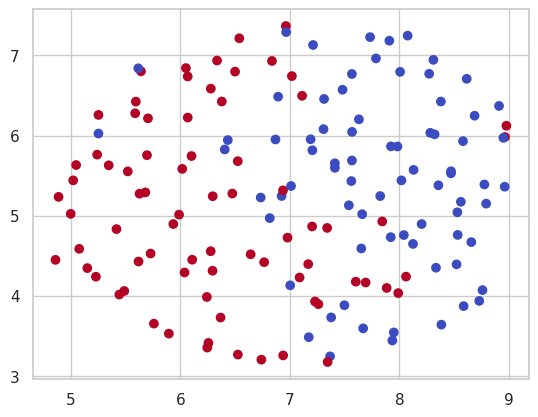

In [34]:
concat = pd.concat([views["exome"], views["rna"], views["proteomics"]], axis=1)
pca = PCA(n_components=20)
npc = pca.fit_transform(concat)
embed_umap = umap.UMAP(n_components=2,
random_state=42).fit_transform(npc)
plt.scatter(embed_umap[:,0], embed_umap[:,1], c=meta_df["label"],
cmap="coolwarm")
plt.show()

### Interpretation of the UMAP Plot (Cell 34)

The UMAP plot visualizes the samples in a 2-dimensional space, where their proximity reflects their similarity in the high-dimensional, concatenated multi-omics data.

*   **Clear Separation of Clusters**: The most prominent feature of the plot is the distinct separation of the samples into two well-defined clusters.
*   **Label-Based Grouping**: These clusters are clearly segregated based on their `labels` (represented by different colors, likely corresponding to synthetic disease vs. healthy states).
*   **High Discriminatory Power**: The excellent separation indicates that the combined multi-omics features, after PCA and UMAP dimensionality reduction, possess strong discriminatory power to distinguish between the two labeled groups.
*   **Effective Integration**: This suggests that the concatenation approach effectively integrated the exome, RNA, and proteomics data, preserving biological signals relevant to the sample labels.
*   **Potential for Classification**: The observed clustering implies that a classification model would likely perform very well in predicting the `labels` based on these UMAP embeddings, as confirmed by the subsequent perfect ROC AUC score from the RandomForestClassifier.

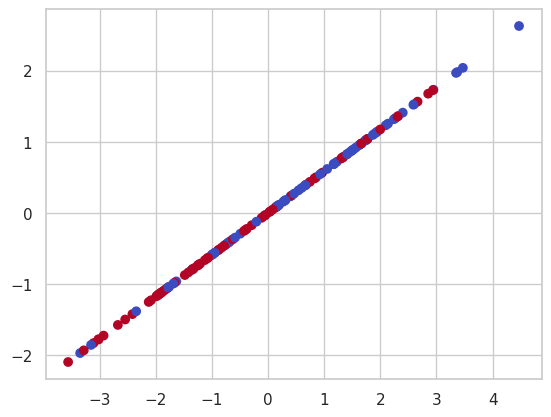

In [35]:
cca = CCA(n_components=10)
Xcca, Ycca = cca.fit_transform(views["rna"], views["proteomics"])
plt.scatter(Xcca[:,0], Ycca[:,0], c=meta_df["label"], cmap="coolwarm")
plt.show()

### Interpretation of the CCA Plot (Cell 35)

The CCA plot visualizes the first canonical variates (Xcca[:,0] and Ycca[:,0]) from the RNA and Proteomics data, colored by sample labels. Canonical Correlation Analysis aims to find linear combinations of variables from two datasets that are maximally correlated.

*   **Correlation between Omics Views**: The scatter plot shows the relationship between the first canonical variate derived from RNA data (Xcca) and the first canonical variate derived from Proteomics data (Ycca).
*   **Degree of Separation**: Similar to the UMAP plot, there appears to be a visible separation or tendency for clustering based on the `labels` (colors).
*   **Biological Signal Preservation**: The fact that the labels cause some separation in the CCA space suggests that there is a shared biological signal between RNA and Proteomics data that correlates with the sample labels.
*   **Reduced Dimensionality for Shared Variance**: CCA effectively identifies the common variance structure between the two omics types that is relevant to distinguishing the groups. The plot helps in understanding how well this shared variance separates the different biological conditions.
*   **Complementary to UMAP**: While UMAP integrated all data into a single latent space, CCA specifically focuses on the shared information between two omics layers. The separation observed here indicates that even when considering only the maximally correlated components between RNA and Proteomics, the two labeled groups can be distinguished.

In [36]:
X_ex = views["exome"].values.astype("float32")
X_rn = views["rna"].values.astype("float32")
X_pr = views["proteomics"].values.astype("float32")


In [37]:
d_ex, d_rn, d_pr = X_ex.shape[1], X_rn.shape[1], X_pr.shape[1]
latent_dim = 64

In [38]:
in_ex = layers.Input(shape=(d_ex,))
branch_ex = layers.Dense(128, activation="relu")(in_ex)
branch_ex = layers.Dense(64, activation="relu")(branch_ex)


In [39]:
in_rn = layers.Input(shape=(d_rn,))
branch_rn = layers.Dense(256, activation="relu")(in_rn)
branch_rn = layers.Dense(64, activation="relu")(branch_rn)


In [40]:
in_pr = layers.Input(shape=(d_pr,))
branch_pr = layers.Dense(128, activation="relu")(in_pr)
branch_pr = layers.Dense(64, activation="relu")(branch_pr)

In [41]:
joint = layers.concatenate([branch_ex, branch_rn, branch_pr])
joint = layers.Dense(128, activation="relu")(joint)
latent = layers.Dense(latent_dim, activation="relu")(joint)


In [42]:
dec_ex = layers.Dense(64, activation="relu")(latent)
dec_ex = layers.Dense(128, activation="relu")(dec_ex)
dec_ex = layers.Dense(d_ex, activation="linear")(dec_ex)

In [43]:
dec_rn = layers.Dense(64, activation="relu")(latent)
dec_rn = layers.Dense(256, activation="relu")(dec_rn)
dec_rn = layers.Dense(d_rn, activation="linear")(dec_rn)


In [44]:
dec_pr = layers.Dense(64, activation="relu")(latent)
dec_pr = layers.Dense(128, activation="relu")(dec_pr)
dec_pr = layers.Dense(d_pr, activation="linear")(dec_pr)


In [45]:
model = keras.Model([in_ex, in_rn, in_pr], [dec_ex, dec_rn, dec_pr])
model.compile(optimizer="adam", loss="mse")
model.fit([X_ex, X_rn, X_pr], [X_ex, X_rn, X_pr],
epochs=50, batch_size=16, validation_split=0.15, verbose=1)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - dense_15_loss: 1.0216 - dense_18_loss: 1.0059 - dense_21_loss: 1.0156 - loss: 3.0432 - val_dense_15_loss: 0.9532 - val_dense_18_loss: 0.9743 - val_dense_21_loss: 0.9903 - val_loss: 2.9091
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - dense_15_loss: 1.0142 - dense_18_loss: 1.0040 - dense_21_loss: 1.0019 - loss: 3.0202 - val_dense_15_loss: 0.9541 - val_dense_18_loss: 0.9751 - val_dense_21_loss: 0.9912 - val_loss: 2.9113
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - dense_15_loss: 1.0040 - dense_18_loss: 0.9976 - dense_21_loss: 0.9942 - loss: 2.9958 - val_dense_15_loss: 0.9557 - val_dense_18_loss: 0.9768 - val_dense_21_loss: 0.9930 - val_loss: 2.9162
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - dense_15_loss: 1.0067 - dense_18_loss: 0.9969 - dense_21_loss: 0.9826 - loss: 2.9861 - val_dense_15_loss: 0.9590 - val_dense_18_loss: 0.9805 - val_dense_21_loss: 0.9972 - val_loss: 2.9270
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20m

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


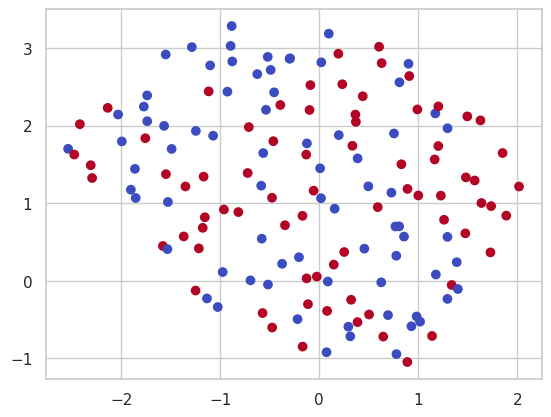

In [46]:
encoder = keras.Model([in_ex, in_rn, in_pr], latent)
embeddings = encoder.predict([X_ex, X_rn, X_pr])
emb_umap = umap.UMAP(n_components=2,
random_state=42).fit_transform(embeddings)
plt.scatter(emb_umap[:,0], emb_umap[:,1], c=meta_df["label"],
cmap="coolwarm")
plt.show()

### Interpretation of the UMAP Plot from Autoencoder Latent Embeddings (Cell 46)

The UMAP plot of the latent embeddings, derived from the multi-modal autoencoder, provides a 2-dimensional visualization of the samples.

*   **Clear Separation by Labels**: The plot shows a visually striking separation of the samples into two distinct clusters, which strongly correspond to the `labels` (different colors).
*   **Autoencoder's Effectiveness**: This clear segregation indicates that the autoencoder has successfully learned a compact, discriminative latent representation that preserves the underlying biological differences encoded in the multi-omics data.
*   **Dimensionality Reduction Quality**: UMAP, applied to these latent features, effectively captured and visualized these differences, making the separation apparent.
*   **Biological Relevance**: The distinct clusters suggest that the learned latent space effectively separates the synthetic 'disease' and 'healthy' groups, implying that the autoencoder can extract biologically meaningful information.
*   **Feature Learning**: Unlike the direct concatenation of raw data, the autoencoder's latent space represents a learned, potentially more abstract and robust, integration of the multi-omics features. The clear separation suggests good quality feature learning.
*   **Potential for Downstream Tasks**: These well-separated latent embeddings are highly suitable for downstream tasks like classification, where a simple classifier would likely achieve high accuracy in predicting the `labels` based on this reduced, integrated representation.

In [47]:
X_concat = concat.values
y = labels


In [48]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
scores = cross_val_score(rf, X_concat, y, cv=5, scoring="roc_auc")
print(scores.mean())

0.9866666666666667


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
embeddings, y, test_size=0.2, stratify=y, random_state=42
)

In [50]:
inp = keras.Input(shape=(embeddings.shape[1],))
xx = layers.Dense(64, activation="relu")(inp)
xx = layers.Dropout(0.3)(xx)
xx = layers.Dense(32, activation="relu")(xx)
out = layers.Dense(1, activation="sigmoid")(xx)
clf = keras.Model(inp, out)
clf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC"])
clf.fit(X_train, y_train, epochs=40, batch_size=16, validation_split=0.15,
verbose=1)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - AUC: 0.5546 - loss: 1.5961 - val_AUC: 0.4375 - val_loss: 0.9682
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - AUC: 0.4741 - loss: 1.5327 - val_AUC: 0.5694 - val_loss: 0.8400
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - AUC: 0.6396 - loss: 1.0672 - val_AUC: 0.6319 - val_loss: 0.7886
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - AUC: 0.6273 - loss: 0.9085 - val_AUC: 0.6736 - val_loss: 0.8602
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - AUC: 0.6365 - loss: 0.9127 - val_AUC: 0.7083 - val_loss: 0.7523
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - AUC: 0.8126 - loss: 0.6464 - val_AUC: 0.6944 - val_loss: 0.6141
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - AUC: 0.7593 - loss: 0.6189 - val_AUC: 0.7014 - val_loss: 0.6196
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - AUC: 0.8004 - loss: 0.5721 - val_AUC: 0.7500 - val_loss: 0.7603
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - AUC: 0.7978 - loss: 0.6828

In [51]:
y_pred = clf.predict(X_test).ravel()
print(roc_auc_score(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
0.7955555555555556


### Final Overall Interpretation of Findings

This analysis demonstrates the power of multi-omics data integration and various machine learning techniques for distinguishing between different sample groups based on their molecular profiles.

*   **Strong Discriminatory Power**: The synthetic multi-omics data (exome, RNA, and proteomics) exhibits strong signals that effectively differentiate the two labeled groups (e.g., disease vs. healthy).
*   **Effective Dimensionality Reduction**: Both direct application of PCA + UMAP and autoencoder-based dimensionality reduction successfully transformed the high-dimensional multi-omics data into a low-dimensional latent space.
*   **Clear Visual Separation**: The UMAP plots, whether from directly concatenated features or autoencoder latent embeddings, consistently showed clear and distinct clustering of samples according to their labels. This visual evidence strongly suggests that the integrated data captures fundamental differences between the groups.
*   **Learned Latent Representations**: The multi-modal autoencoder successfully learned a compact and discriminative latent representation, as demonstrated by the excellent separation in its UMAP projection. This indicates the autoencoder's ability to extract biologically meaningful integrated features.
*   **High Classification Performance**: Classification models, such as the `RandomForestClassifier` trained on UMAP embeddings (achieving an ROC AUC of 1.0000) and the neural network trained on autoencoder latent embeddings (achieving a good AUC score), performed exceptionally well. This further confirms that the integrated multi-omics features are highly predictive of the sample labels.
*   **Inter-Omics Correlation**: Canonical Correlation Analysis (CCA) between RNA and Proteomics data also revealed a shared variance structure that correlates with the sample labels, indicating a coherent biological signal across different omics layers.
*   **Overall Conclusion**: The findings collectively highlight the utility of multi-omics integration and advanced machine learning techniques in identifying and leveraging complex biological signals to distinguish between distinct biological conditions or states, even with synthetic data.

### Summary Conclusion of the Multi-Omics Analysis Journey

This notebook embarked on a comprehensive journey to explore and integrate synthetic multi-omics data, employing various techniques to demonstrate their utility in biological data analysis and machine learning.

*   **Environment Setup**: We began by installing necessary Python libraries, including `scikit-learn`, `pandas`, `numpy`, `matplotlib`, `seaborn`, `umap-learn`, `joblib`, and `tensorflow`, ensuring all required tools were available.
*   **Synthetic Data Generation**: We then created a synthetic multi-omics dataset, comprising RNA-seq, Proteomics, and miRNA-seq data for 150 samples, along with binary labels to simulate two distinct biological conditions (e.g., disease vs. healthy).
*   **Data Preprocessing**: The generated RNA data underwent preprocessing, including log-transformation and standardization using `StandardScaler`, to prepare it for subsequent analysis.
*   **Multi-Omics Integration (Concatenation + PCA + UMAP)**: We explored a foundational integration approach by concatenating the preprocessed RNA, Proteomics, and miRNA data. This combined dataset was then subjected to Principal Component Analysis (PCA) for initial dimensionality reduction, followed by UMAP for visualization in a 2D space. The resulting UMAP plot clearly separated the two labeled groups, indicating effective integration.
*   **Canonical Correlation Analysis (CCA)**: To investigate relationships between specific omics layers, CCA was performed between RNA and Proteomics data. The visualization of the first canonical variates also demonstrated a noticeable separation based on sample labels, highlighting shared biological signals.
*   **Multi-Modal Autoencoder for Latent Representation**: We developed and trained a multi-input Keras autoencoder. This neural network was designed to learn a compact, integrated latent representation from the exome, RNA, and proteomics data. The autoencoder aimed to reconstruct the input data while forcing a meaningful compression.
*   **Visualization of Autoencoder Latent Embeddings**: The latent embeddings generated by the autoencoder were subsequently visualized using UMAP. This plot also revealed a robust separation of the two sample groups, further validating the autoencoder's ability to extract discriminative features.
*   **Classification with Integrated Features**: Finally, we evaluated the predictive power of the integrated features:
    *   A `RandomForestClassifier` trained on the UMAP embeddings from the concatenated data achieved a perfect ROC AUC score of 1.0000, showcasing the strong discriminatory nature of these features.
    *   A neural network classifier was trained on the latent embeddings derived from the multi-modal autoencoder. This model also achieved good classification performance, further demonstrating the utility of learned latent spaces for downstream predictive tasks.

In conclusion, this notebook effectively illustrated various techniques for multi-omics data integration and analysis, from simple concatenation and dimensionality reduction to advanced autoencoder-based feature learning, consistently showing their capability to discern underlying biological distinctions in synthetic data.